# 1. IMPORTING

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

# importing ROC-AUC score to valuate models
from sklearn.metrics import roc_auc_score

# importing ROC curve to visualize ROC curve
from sklearn.metrics import roc_curve

# confusion matrix to show TP, TN, FP, FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# classification report to describe model accuracy
from sklearn.metrics import classification_report

In [2]:
#import dataset
df = pd.read_csv("../data/source/dataset.csv")

# 2. SPLITTING

In [3]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

In [4]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [5]:
# checking shapes of X's
print(X.shape, X_train.shape, X_test.shape, X_val.shape)

(50000, 300) (35000, 300) (4500, 300) (10500, 300)


In [6]:
# checking shapes of y's
print(y.shape, y_train.shape, y_test.shape, y_val.shape)

(50000,) (35000,) (4500,) (10500,)


# EXPORTING

In [7]:
# exporting data
relative_path = "../data/validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv(relative_path + '/train_X.csv', encoding='utf-8')
X_test.to_csv(relative_path + '/test_X.csv', encoding='utf-8')
X_val.to_csv(relative_path + '/val_X.csv', encoding='utf-8')

y_train.to_csv(relative_path + '/train_y.csv', encoding='utf-8')
y_test.to_csv(relative_path + '/test_y.csv', encoding='utf-8')
y_val.to_csv(relative_path + '/val_y.csv', encoding='utf-8')

# 3. DATASET INFO

In [8]:
# first five rows
X_train.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
13889,0,0,0.0,2.88,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
18173,0,0,0.0,2.91,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
11779,0,0,0.0,2.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
28068,0,0,0.0,5.82,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0
26232,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0


In [9]:
y_train.head()

13889    0
18173    0
11779    0
28068    0
26232    0
Name: target, dtype: int64

In [10]:
# shape
X_train.shape

(35000, 300)

In [11]:
# info
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 300 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    var_1    35000 non-null  int64  
 1    var_2    35000 non-null  int64  
 2    var_3    35000 non-null  float64
 3    var_4    35000 non-null  float64
 4    var_5    35000 non-null  float64
 5    var_6    35000 non-null  int64  
 6    var_7    35000 non-null  int64  
 7    var_8    35000 non-null  int64  
 8    var_9    35000 non-null  int64  
 9    var_10   35000 non-null  int64  
 10   var_11   35000 non-null  float64
 11   var_12   35000 non-null  float64
 12   var_13   35000 non-null  float64
 13   var_14   35000 non-null  int64  
 14   var_15   35000 non-null  int64  
 15   var_16   35000 non-null  float64
 16   var_17   35000 non-null  float64
 17   var_18   35000 non-null  float64
 18   var_19   35000 non-null  int64  
 19   var_20   35000 non-null  int64  
 20   var_21   35000 non-nul

In [12]:
# description
X_train.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,3.500000e+04,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,3.500000e+04
mean,0.002229,0.000029,16.754658,3.152425,623.621139,5.714286e+03,0.000257,0.033257,0.000257,0.000257,...,0.006686,0.083938,0.010114,0.0,0.128229,0.085200,0.0,0.003343,15.130148,5.643619e+03
std,0.113369,0.005345,1426.650119,2.745780,10899.867683,7.559181e+05,0.027774,0.314115,0.027774,0.035856,...,0.143274,1.107691,0.212500,0.0,0.608109,0.603805,0.0,0.082914,952.917261,4.711153e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,3.000000,3.000000,6.000000,...,6.000000,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style to Seaborn
sns.set_style('white')


def classification(x):
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
    bin_idx = np.digitize(x, bins)-1
    return bins[bin_idx]

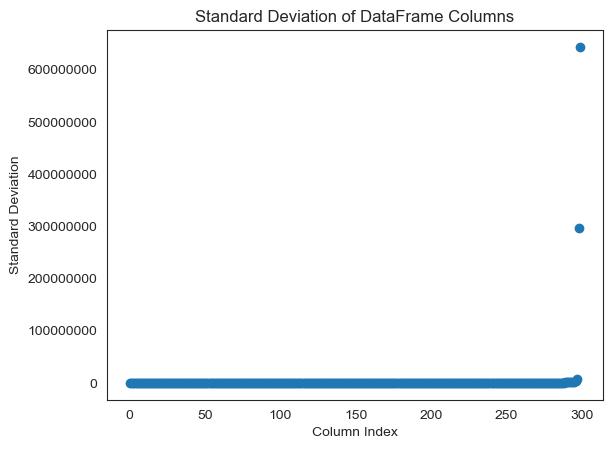

In [14]:
import matplotlib.pyplot as plt
std_devs = X_train.std().apply(lambda row: round(row, 2)).sort_values(ascending=True).reset_index(name="values")
std_devs["bin"] = std_devs["values"].apply(func=classification)


plt.scatter(std_devs.index, std_devs["values"])
# Set Y-axis label format to regular values
plt.ticklabel_format(style='plain', axis='y')

# Add title and axis labels
plt.title('Standard Deviation of DataFrame Columns')
plt.xlabel('Column Index')
plt.ylabel('Standard Deviation')
# Show the plot
plt.show()

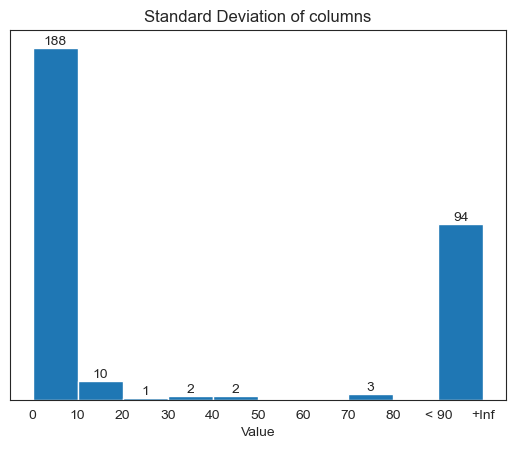

In [15]:
# Set the style to Seaborn
sns.set_style('white')

# Define the bin edges and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '< 90', '+Inf']

# Generate some random data
data = np.random.randint(0, 101, size=1000)

# Plot the histogram with the custom bin edges and labels
plt.hist(std_devs['bin'], bins=bins)
plt.xticks(bins, labels)  # Set the x-axis tick labels to the custom labels
plt.xlabel('Value')
plt.title('Standard Deviation of columns')

# Display the value of each bar at the top of the bar
for patch in plt.gca().patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y!=0:
        plt.text(x, y, f"{y:.0f}", ha='center', va='bottom')

        # Remove the y-axis labels
plt.gca().axes.get_yaxis().set_visible(False)

# Set the Seaborn style
sns.set_style('whitegrid')

# Show the plot
plt.show()

# 4. TRANSFORMATIONS

## 4.1. NAs

In [16]:
def nan_handler(df):    
    # medians per column
    medians_train = {}
    
    # iterate over every column
    for column in df.columns:
        # calculate median for given column
        medians_train[column] = df[column].median()
        
        # replace NAs with median
        df[column].fillna(medians_train[column], inplace=True)
        
    print("NAs handled")
    return df 

## 4.2. OUTLIERS

In [17]:
from scipy.stats import zscore

def outliers_handler(df):
    # calculate z-scores for each column
    z_scores = np.abs(zscore(df))
    
    # set a threshold for the z-score values
    threshold = 2.5
    
    # define the means_train dictionary
    means_train = {}

    # loop over each column in X_train
    for column in df.columns:
        # ientify the rows where the z-score exceeds the threshold  
        outliers = z_scores[column] > threshold

        # calculate the mean of the column excluding outliers
        means_train[column] = np.nanmean(df[column][~outliers])

        # replace values that exceed the threshold
        if outliers.any():
            # values in current columns with outliers
            values = df[column].values
            
            # mean with no outliers
            mean = means_train[column]
            
            # True is written where outlier is
            mask = outliers
            
            # iterate through every outlier in column
            for i in np.where(mask)[0]:
                if values[i] > mean:
                    # find last value greater than mean and within 2.5 std
                    replacement_candidates = values[(values > mean) & ~outliers]
                    if len(replacement_candidates) > 0:
                        replacement = sorted(replacement_candidates)[-1]
                    else:
                        replacement = mean
                else:
                    # find last value less than mean and within 2.5 std
                    replacement_candidates = values[(values < mean) & ~outliers]
                    if len(replacement_candidates) > 0:
                        replacement = sorted(replacement_candidates)[0]
                    else:
                        replacement = mean
                df.iloc[i, df.columns.get_loc(column)] = replacement
                
    print("outliers handled")
    return df 

## 4.3. STANDARIZATION

In [18]:
def standarization_handler(df):    
    scaler = StandardScaler()
    scaler.fit(df)
    scaled = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    
    print("standarization handled")
    return scaled_df  

# 5. FEATURE NUMBER REDUCTION

## 5.1. DUPLICATES

In [19]:
def drop_duplicate_features(df):
    # retrieve duplicate features object
    duplicate_features = get_duplicate_features(df)
    
    # retrieve names of duplicate features
    duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
    
    # remove duplicates
    df.drop(columns = duplicate_features, inplace=True)
    
    print("duplicate features dropped")
    return df

## 5.2. CONSTANTS

In [20]:
def drop_constant_features(df):
    # retrieve constant features object
    constant_features = get_constant_features(df)
    
    # retrieve names of constant features
    constant_features = constant_features[constant_features['Perc'] > 98]['Var'].tolist()
    
    # remove constant features
    df.drop(columns = constant_features, inplace=True)
    
    print("constant features dropped")
    return df

## 5.3. CORRELATED

In [21]:
def drop_correlated_features(df):
    # calculate correlation
    corr = df.corr(method="spearman").abs()
    
    # retrieve correlation data
    upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    
    # retrieve highly correlated features' names
    corr_features = []
    for col in upper_triangle:
        if any(upper_triangle[col] > 0.8): 
            corr_features.append(col)

    # remove correlated features
    corr_features = pd.Series(corr_features)
    df.drop(columns = corr_features, inplace=True)
    
    print("correlated features dropped")
    return df

# 6. MODELS 

## 6.1. PREPARE

In [22]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

nan_handler_transf = FunctionTransformer(nan_handler)
outliers_handler_transf = FunctionTransformer(outliers_handler)
standarization_handler_transf = FunctionTransformer(standarization_handler)
drop_duplicate_features_transf = FunctionTransformer(drop_duplicate_features)
drop_constant_features_transf = FunctionTransformer(drop_constant_features)
drop_correlated_features_transf = FunctionTransformer(drop_correlated_features)

prepare = Pipeline([
    ("nan_handling", nan_handler_transf),
    ("outliers_handling", outliers_handler_transf),
    ("standarization_handling", standarization_handler_transf),
    ("dropping_duplicate_features", drop_duplicate_features_transf),
    ("dropping_constant_features", drop_constant_features_transf),
    ("dropping_correlated_features", drop_correlated_features_transf)
])

In [23]:
def prepare_dataset(df, consistent_cols = []):
    df = nan_handler(df)
    df = outliers_handler(df)
    df = standarization_handler(df)
    
    if len(consistent_cols) == 0:
        df = drop_duplicate_features(df)
        df = drop_constant_features(df)
        df = drop_correlated_features(df)
    else:
        to_drop = filter(lambda i: i not in consistent_cols, df.columns)
        df.drop(columns = list(to_drop), inplace=True)
        print("columns consistent")
    
    return df

In [24]:
if False:
    X_train = prepare.fit_transform(X_train)
    X_val = prepare.transform(X_val)
    X_test = prepare.transform(X_test)
else:
    X_train = prepare_dataset(X_train)
    X_val = prepare_dataset(X_val, X_train.columns)
    X_test = prepare_dataset(X_test, X_train.columns)

NAs handled
outliers handled
standarization handled
duplicate features dropped
constant features dropped
correlated features dropped
NAs handled
outliers handled
standarization handled
columns consistent
NAs handled
outliers handled
standarization handled
columns consistent


In [25]:
X_train.shape

(35000, 34)

In [26]:
X_val.shape

(10500, 34)

## 6.2 EVALUATING MODELS

In [27]:
def model_evaluation(model, X_df, y_df):
    y_pred_proba = model.predict_proba(X_df)
    y_pred = model.predict(X_df)
    # roc curve for models
    fpr_model, tpr_model, thresh_model = roc_curve(y_df, y_pred_proba[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_df))]
    p_fpr, p_tpr, _ = roc_curve(y_df, random_probs, pos_label=1)

    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr_model, tpr_model, linestyle='--',color='orange', label=type(model).__name__)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
    
    # auc scores
    auc_score_model = roc_auc_score(y_df, y_pred_proba[:,1])

    print("Classification report: ", "\n" , classification_report(y_df, y_pred))
    print("Random Forest Score: ", model.score(X_df,y_df))
    print("AUC score: ", auc_score_model)
    
    ConfusionMatrixDisplay.from_estimator(model, X_df, y_df)
    plt.show()
    
    return {"model": model, "auc": auc_score_model}

auc_scores = []

### 6.2.1. K Neighbors model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KN_model = KNeighborsClassifier(n_neighbors=4)
KN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### EVALUATION

C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


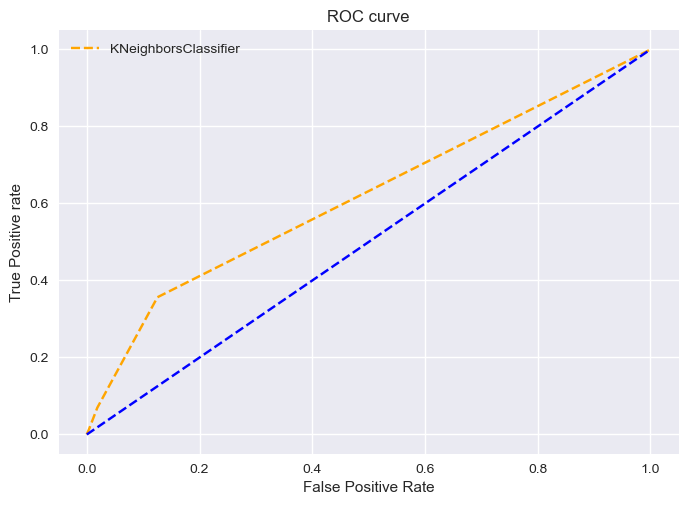

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.12      0.01      0.02       418

    accuracy                           0.96     10500
   macro avg       0.54      0.50      0.50     10500
weighted avg       0.93      0.96      0.94     10500



C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest Score:  0.9579047619047619
AUC score:  0.6166269129027144


C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


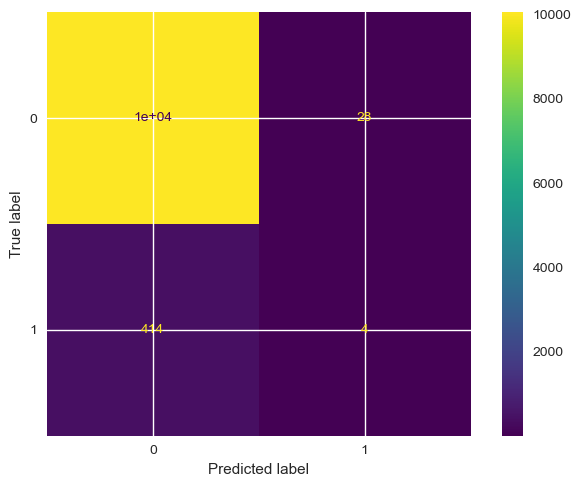

In [29]:
auc_scores.append(model_evaluation(KN_model, X_val, y_val))

### 6.2.2. Logistic Regression model

In [30]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

### EVALUATION

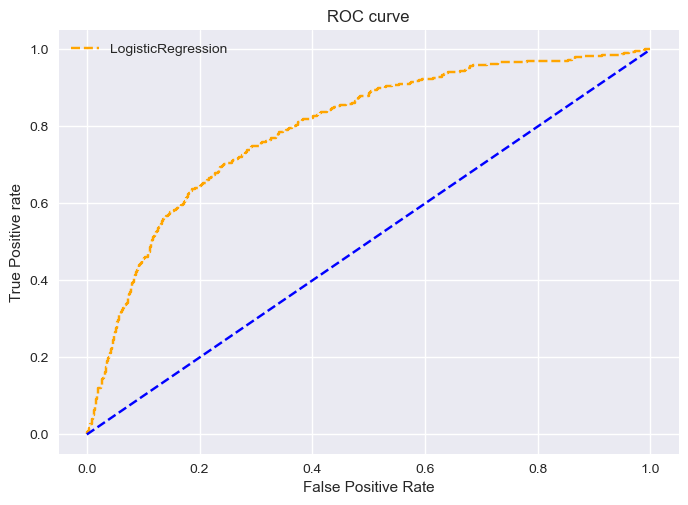

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.00      0.00      0.00       418

    accuracy                           0.96     10500
   macro avg       0.48      0.50      0.49     10500
weighted avg       0.92      0.96      0.94     10500

Random Forest Score:  0.9598095238095238
AUC score:  0.7930266076545532


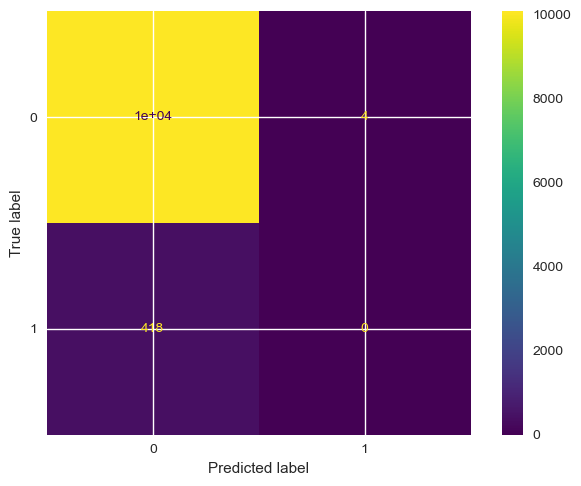

In [31]:
auc_scores.append(model_evaluation(LR_model, X_val, y_val))

### 6.2.3. Random Forest model

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2)

### EVALUATION

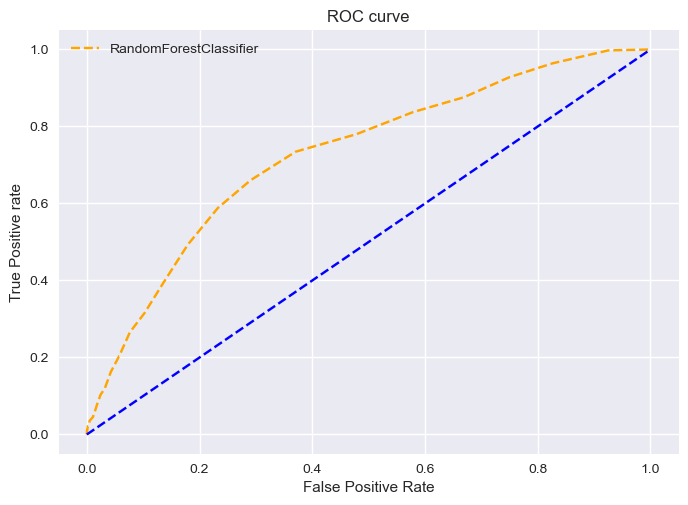

C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.00      0.00      0.00       418

    accuracy                           0.96     10500
   macro avg       0.48      0.50      0.49     10500
weighted avg       0.92      0.96      0.94     10500

Random Forest Score:  0.9601904761904761
AUC score:  0.7274758463850018


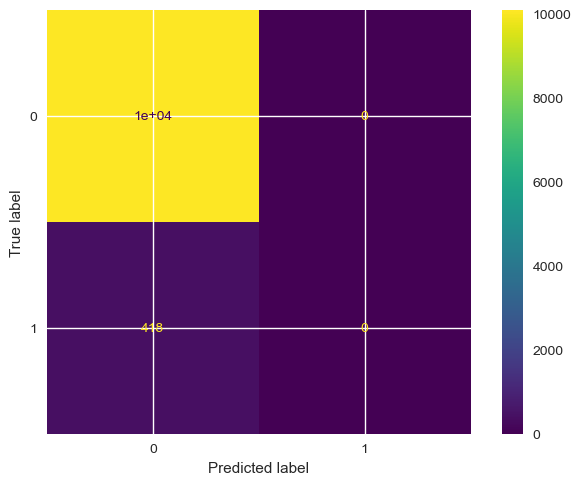

In [34]:
auc_scores.append(model_evaluation(rf_model, X_val, y_val))

### VERIFYING FEATURE IMPORTANCE IN RANDOM FOREST MODEL

In [35]:
# Get feature importances and sort them in descending order
importances = rf_model.feature_importances_
sorted_indices = importances.argsort()[::-1]
columns = X_train.columns

# Identify non-predictive columns
non_predictive_cols = []
for i in sorted_indices:
    if importances[i] < 0.05:
        non_predictive_cols.append(columns[i])
        
# Remove non-predictive columns
reduced_X_train = X_train.drop(columns=non_predictive_cols)

# Train a new random forest classifier on the reduced dataset
rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_reduced.fit(reduced_X_train, y_train)

RandomForestClassifier(random_state=42)

### 2ND EVALUATION OF RANDOM FOREST MODEL

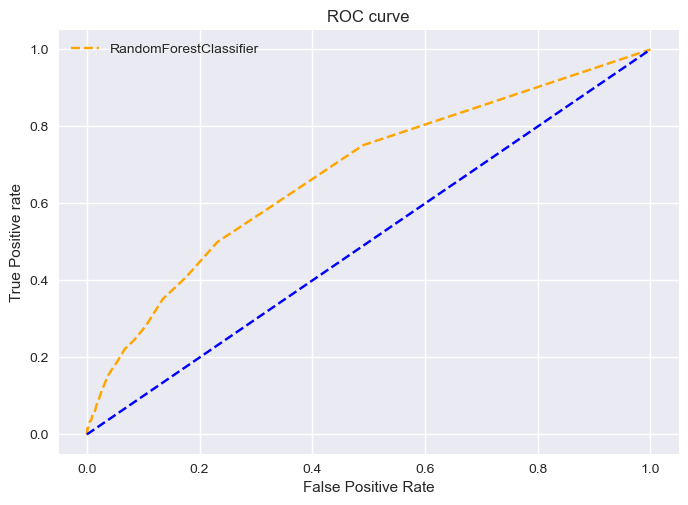

C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.00      0.00      0.00       418

    accuracy                           0.96     10500
   macro avg       0.48      0.50      0.49     10500
weighted avg       0.92      0.96      0.94     10500

Random Forest Score:  0.9601904761904761
AUC score:  0.6765933223168107


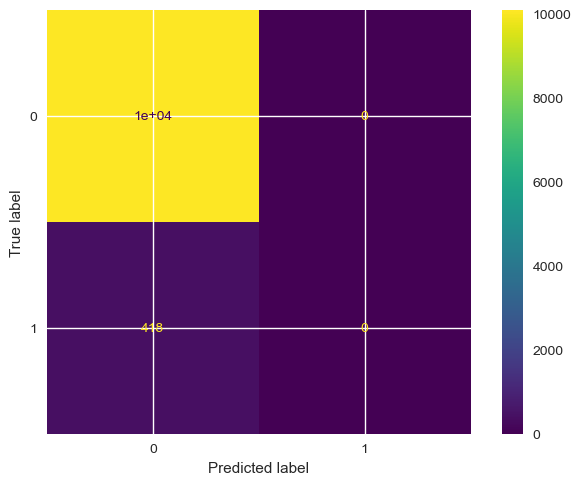

In [36]:
reduced_X_val = X_val.drop(non_predictive_cols, axis=1)

auc_scores.append(model_evaluation(rf_model_reduced, reduced_X_val, y_val))

### 6.2.4. Gradient Boosting model

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

In [38]:
# train a Gradient Boosting classifier
GB_clf = GradientBoostingClassifier(random_state=42)
GB_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### EVALUATION

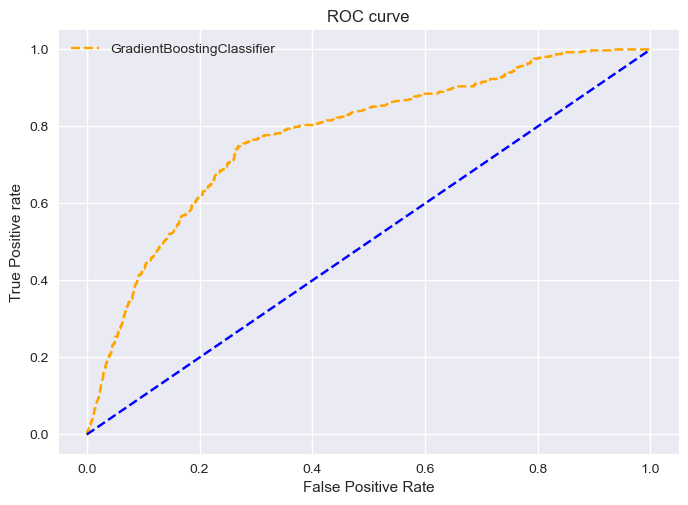

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.17      0.01      0.02       418

    accuracy                           0.96     10500
   macro avg       0.57      0.50      0.50     10500
weighted avg       0.93      0.96      0.94     10500

Random Forest Score:  0.9587619047619048
AUC score:  0.7766323325762242


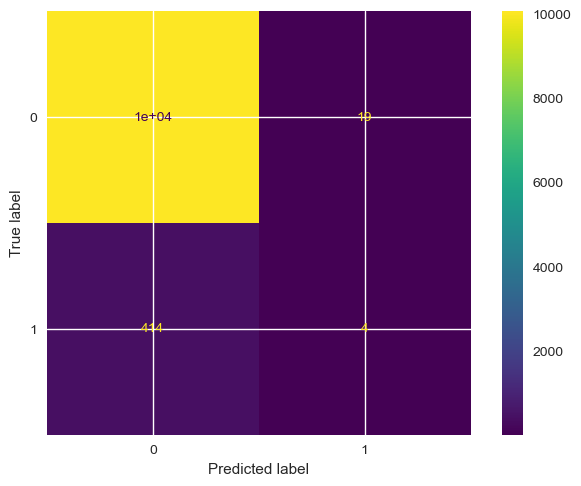

In [39]:
auc_scores.append(model_evaluation(GB_clf, X_val, y_val))

### 6.2.5. XGBoost model

In [40]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# train an XGBoost classifier
XGB_model = XGBClassifier(random_state=42)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### EVALUATION

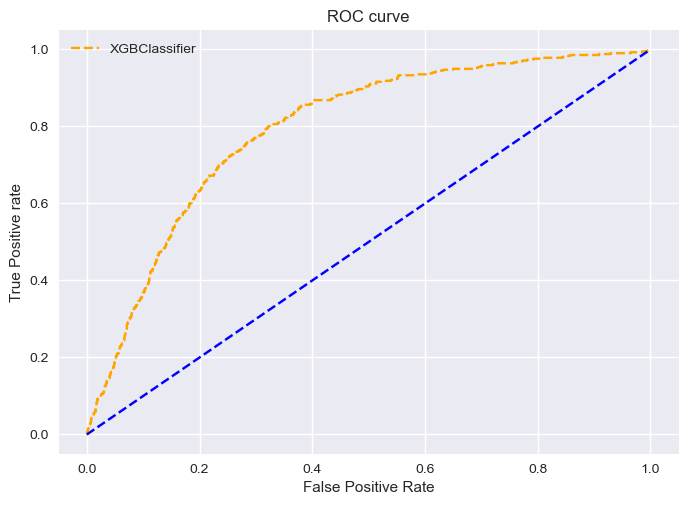

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10082
           1       0.17      0.00      0.00       418

    accuracy                           0.96     10500
   macro avg       0.56      0.50      0.49     10500
weighted avg       0.93      0.96      0.94     10500

Random Forest Score:  0.9598095238095238
AUC score:  0.7932275911686848


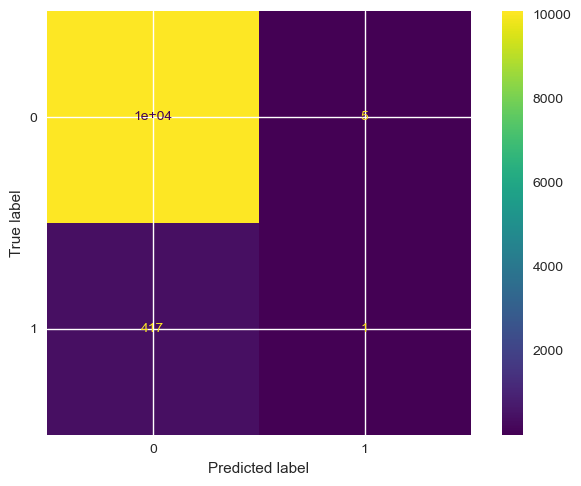

In [41]:
auc_scores.append(model_evaluation(XGB_model, X_val, y_val))

## 6.3. Hyperparameters tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [43]:
sorted(auc_scores, key=lambda x: x["auc"])

[{'model': KNeighborsClassifier(n_neighbors=4), 'auc': 0.6166269129027144},
 {'model': RandomForestClassifier(random_state=42), 'auc': 0.6765933223168107},
 {'model': RandomForestClassifier(n_jobs=2), 'auc': 0.7274758463850018},
 {'model': GradientBoostingClassifier(random_state=42),
  'auc': 0.7766323325762242},
 {'model': LogisticRegression(), 'auc': 0.7930266076545532},
 {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=

Based on auc value we select LogisticRegression model as the best one

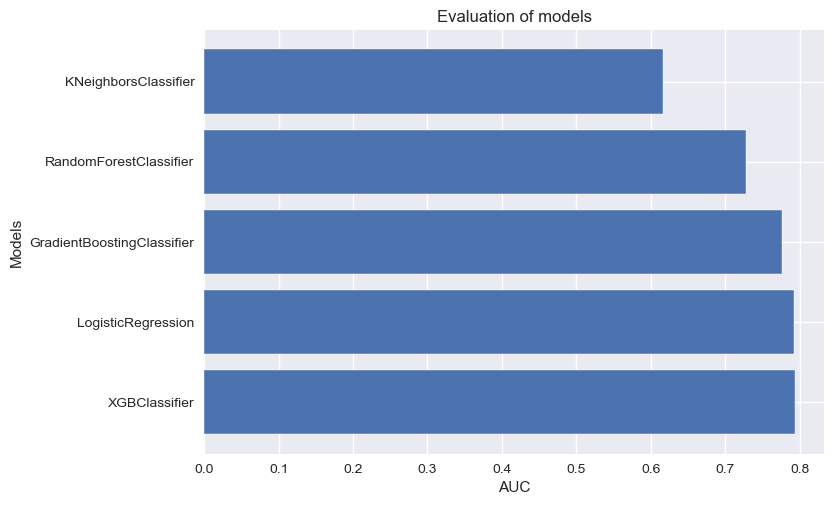

In [44]:
# create the horizontal bar plot

auc_scores = pd.DataFrame(auc_scores)
auc_scores["name"] = auc_scores["model"].apply(lambda x: type(x).__name__)
auc_scores = auc_scores.sort_values("auc",ascending=True)

plt.barh(auc_scores["name"], auc_scores["auc"])
# add labels and title
plt.xlabel('AUC')
plt.ylabel('Models')
plt.title('Evaluation of models')

# rotate the plot 90 degrees to the right
plt.gca().invert_yaxis()
#plt.xticks(rotation=90)


# show the plot
plt.show()

In [45]:
print('Current parameters:')
print(LR_model.get_params())

Current parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [46]:
LR_model = LogisticRegression()

solver = ["lbfgs", "liblinear", "saga"]
max_iter = [50, 100, 200]
verbose = [*range(0, 50, 10)]
param_grid = dict(solver=solver, max_iter=max_iter, verbose=verbose)

### 6.3.1. GridSearchCV

In [47]:
grid = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.9601428570777824 using {'max_iter': 50, 'solver': 'lbfgs', 'verbose': 0}


C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
best_model_grid = grid_result.best_estimator_
best_model_grid.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

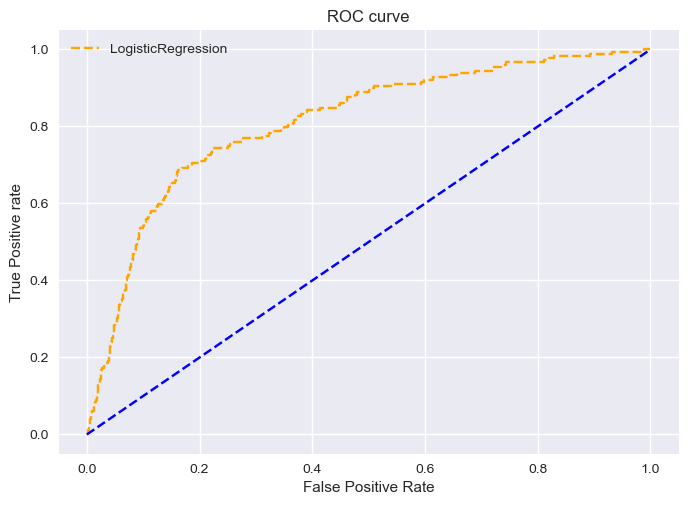

Classification report:  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4321
           1       0.00      0.00      0.00       179

    accuracy                           0.96      4500
   macro avg       0.48      0.50      0.49      4500
weighted avg       0.92      0.96      0.94      4500

Random Forest Score:  0.9597777777777777
AUC score:  0.8106738689445724


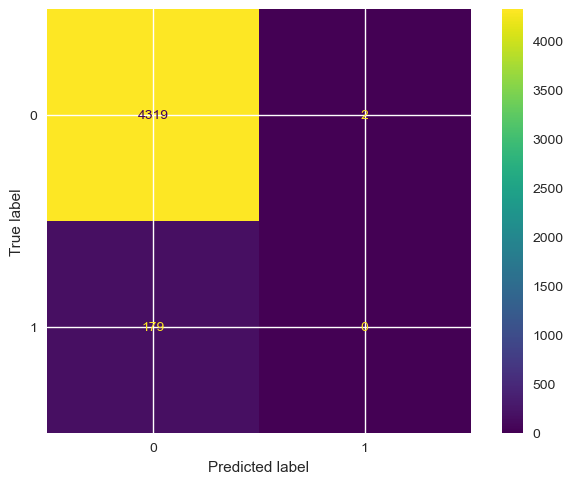

C:\Users\Wojtek\AppData\Local\Temp\ipykernel_6836\2533344991.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auc_scores.append(model_evaluation(best_model_grid, X_test, y_test), ignore_index=True)


,model,auc,name
0,KNeighborsClassifier(n_neighbors=4),0.616627,KNeighborsClassifier
1,"(DecisionTreeClassifier(max_features='auto', r...",0.676593,RandomForestClassifier
2,"(DecisionTreeClassifier(max_features='auto', r...",0.727476,RandomForestClassifier
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.776632,GradientBoostingClassifier
4,LogisticRegression(),0.793027,LogisticRegression
5,"XGBClassifier(base_score=None, booster=None, c...",0.793228,XGBClassifier
6,LogisticRegression(max_iter=50),0.810674,NaN


In [49]:
auc_scores.append(model_evaluation(best_model_grid, X_test, y_test), ignore_index=True)

### 6.3.2. RandomizedSearchCV

In [50]:
random = RandomizedSearchCV(estimator=LR_model, param_distributions=param_grid, cv = 3, n_jobs=-1)

random_result = random.fit(X_train, y_train)

print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Best: 0.960143 using {'verbose': 10, 'solver': 'saga', 'max_iter': 50}


C:\Users\Wojtek\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [51]:
best_model_random = random_result.best_estimator_
best_model_random.score(X_test, y_test)

0.9597777777777777

# 7. SUMMARY

In the end LogisticRegression model turned out to be the best one. After some experimentation with hyperparameters tuning the most optimal hyperparameters are verbose=10, solver=saga, max_iter=100 which were retrieved using RandomSearchCV method, whilst GridSearchCV method was very close to the same result with hyperparameters max_iter=50, solver=lbfgs, verbose=0.

# EXPORTING

In [52]:
# exporting preprocessed dataset to csv
relative_path = "../data/preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
X_train.to_csv(relative_path + '/train_dataset.csv', encoding='utf-8')